In [232]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [233]:
all_anime_data = []

In [237]:
for page in range(0, 300, 50):
    url = f"https://myanimelist.net/topanime.php?limit={page}"
    print(f"Scraping page: {page // 50 + 1}")
    anime_data = scrape_anime_page(url)
    all_anime_data.extend(anime_data)

print(f"Total data scraped: {len(all_anime_data)}")

Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Total data scraped: 600


In [239]:
def scrape_anime_page(url):
    headers = {"User-Agent": "Mozilla/5.0"} 
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    anime_list = []
    for anime in soup.select("tr.ranking-list"):

        title = anime.select_one("h3 > a")
        title = title.text.strip() if title else "Unknown"

        score = anime.select_one("td.score span")
        score = score.text.strip() if score else "N/A"

        info = anime.select_one("div.information")
        info = info.text.strip() if info else "Unknown"

        anime_list.append({
            "Title": title,
            "Score": score,
            "Info": info
        })
    return anime_list


In [240]:
df = pd.DataFrame(all_anime_data)
print(df.head(10))

                                Title Score  \
0                   Sousou no Frieren  9.30   
1    Fullmetal Alchemist: Brotherhood  9.10   
2                         Steins;Gate  9.07   
3  Shingeki no Kyojin Season 3 Part 2  9.05   
4                One Piece Fan Letter  9.05   
5                            Gintama°  9.05   
6                  Gintama: The Final  9.04   
7              Hunter x Hunter (2011)  9.03   
8                            Gintama'  9.02   
9                 Gintama': Enchousen  9.02   

                                                Info  
0  TV (28 eps)\n        Sep 2023 - Mar 2024\n    ...  
1  TV (64 eps)\n        Apr 2009 - Jul 2010\n    ...  
2  TV (24 eps)\n        Apr 2011 - Sep 2011\n    ...  
3  TV (10 eps)\n        Apr 2019 - Jul 2019\n    ...  
4  TV Special (1 eps)\n        Oct 2024 - Oct 202...  
5  TV (51 eps)\n        Apr 2015 - Mar 2016\n    ...  
6  Movie (1 eps)\n        Jan 2021 - Jan 2021\n  ...  
7  TV (148 eps)\n        Oct 2011 - Sep 20

DATA CLEANSING

In [ ]:
def parse_score(score):
    try:
        return float(score)
    except ValueError:
        return None

def extract_type_episode(info):
    match = re.match(r"(\w+)\s+\((\d+)\s+eps?\)", info)
    if match:
        return match.group(1), int(match.group(2))
    else:
        return "Unknown", None

def extract_years(info):
    years = re.findall(r'(?:19|20)\d{2}', info)
    
    if len(years) == 1:
        return int(years[0]), None
    elif len(years) >= 2:
        return int(years[0]), int(years[1])
    else:
        return None, None

In [217]:
df['Score'] = df['Score'].map(parse_score)

df['Type'], df['Episodes'] = zip(*df['Info'].map(extract_type_episode))
df['Year_start'], df['Year_end'] = zip(*df['Info'].map(extract_years))

df['Year_start'] = df['Year_start'].fillna(0).astype('Int64')
df['Year_end'] = df['Year_end'].fillna(0).astype('Int64')


In [218]:
df.drop(columns=['Info'], inplace=True)

In [231]:
cols = ['Title', 'Score', 'Type', 'Episodes', 'Year_start', 'Year_end']
df = df[cols]
print(df.head(10))

                                Title  Score     Type  Episodes  Year_start  \
0                   Sousou no Frieren   9.30       TV      28.0        2023   
1    Fullmetal Alchemist: Brotherhood   9.10       TV      64.0        2009   
2                         Steins;Gate   9.07       TV      24.0        2011   
3  Shingeki no Kyojin Season 3 Part 2   9.05       TV      10.0        2019   
4                One Piece Fan Letter   9.05  Unknown       NaN        2024   
5                            Gintama°   9.05       TV      51.0        2015   
6                  Gintama: The Final   9.04    Movie       1.0        2021   
7              Hunter x Hunter (2011)   9.03       TV     148.0        2011   
8                            Gintama'   9.02       TV      51.0        2011   
9                 Gintama': Enchousen   9.02       TV      13.0        2012   

   Year_end  
0      2024  
1      2010  
2      2011  
3      2019  
4      2024  
5      2016  
6      2021  
7      2014  
8   

In [221]:
df.to_excel("result_scraping_anime.xlsx", index=False)

ANALISIS

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

TREN JUMLAH ANIME DIRILIS PER TAHUN

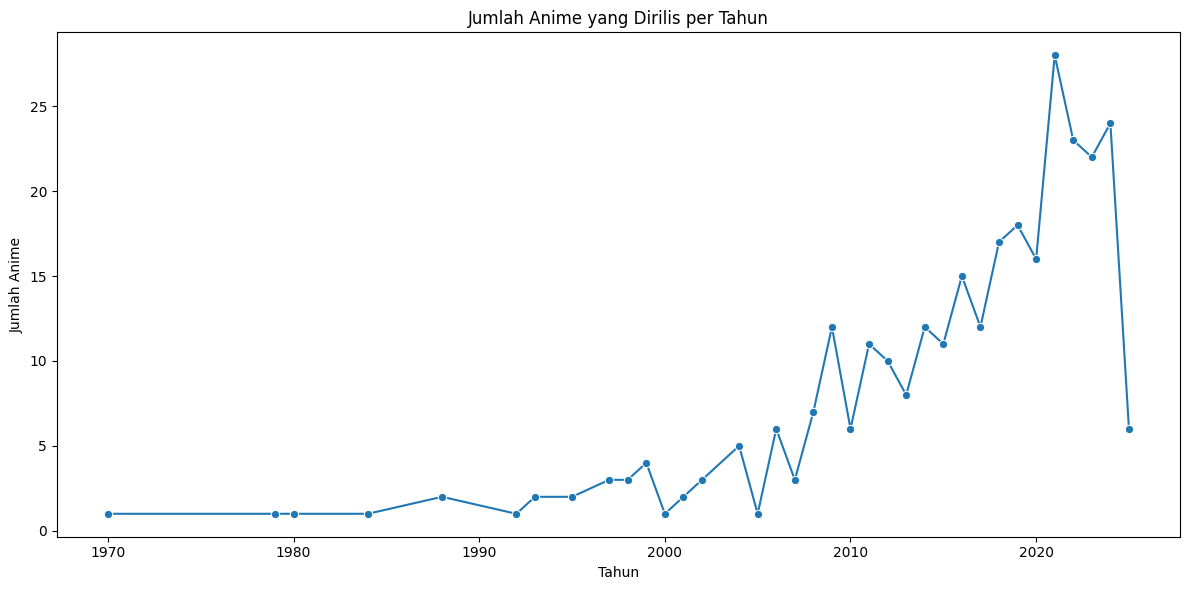

In [229]:
plt.figure(figsize=(12, 6))
year_counts = df[df['Year_start'] > 1900]['Year_start'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Jumlah Anime yang Dirilis per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Anime')
plt.tight_layout()
plt.show()

Jumlah Anime per Tipe

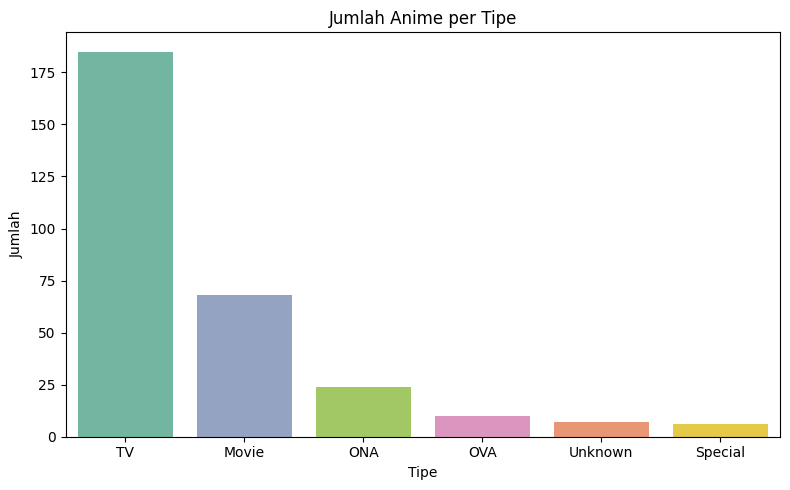

In [230]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Type', hue='Type', order=df['Type'].value_counts().index, palette='Set2', legend=False)
plt.title('Jumlah Anime per Tipe')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()